In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# DotA2

*Defense of the Ancients 2* is a MOBA developed by Valve, the sequel to the custom user map in Blizzard's *Warcraft III: The Frozen Throne*. It is one of the most popular games in all of eSports, and by far has the highest pay out pool of any game in history. *The International* (TI)is the premiere world championship Dota2 tournament, held annually. While the prize-pool changes year to year, 1st place takes home millions of dollars (8.5m in 2022, $18m in 2021, $15.6m in 2019, etc.). Leading up to TI are a series of leagues and qualifiers to determine participation.

Dota2 is known for its extreme complexity and steep learning curve. There are 124 heroes (each with usually at least 4 abilities), 200+ items, and teams consisting of 5 heroes each. Parametrically this makes for an absurd number of combinations just in player selections - the complexity skyrockets even more when you consider lane pairings, item builds, and more. The amount of information one needs to know to competetively play DotA2 is astronomical (not to mention the general skill needed to control a character, coordinate with a team, and react to your opponents!). Trying to quantify the complexity and meta within the game is a near impossible task, but we can sift through large amounts of match data in order to understand trends in how the game is played today.

In this notebook we are going to leverage match data from various professional leagues in 2023 leading up to TI2023 (Starting October 12,2023!). The website [OpenDota](https://docs.opendota.com/) has a complete API for requesting data. While it is free they do implement rate limiting (at which point they require paypent while limiting is in effect). So long as we keep our requsts below 60 calls per minute no rate limiting will be imposed (however... the data we need is going to be provided, so that we do not need to request data!).

We are going to work with match data from the following majors/professional brackets:

* [DreamLeague Season 19](https://liquipedia.net/dota2/DreamLeague/Season_19) (2023-04-09 - 2023-04-23)
* [DreamLeague Season 20](https://liquipedia.net/dota2/DreamLeague/Season_20) (2023-06-11 - 2023-06-25)
* [DreamLeague Season 21](https://liquipedia.net/dota2/DreamLeague/Season_21) (2023-09-18 - 2023-09-24)
* [Lima Major 2023](https://liquipedia.net/dota2/Lima_Major/2023) (2023-02-22 - 2023-03-05)
* [ESL One Berlin Major 2023](https://liquipedia.net/dota2/ESL_One/Berlin_Major/2023) (2023-04-26 - 2023-05-07)
* [Bali Major 2023](https://liquipedia.net/dota2/Bali_Major/2023) (2023-06-29 - 2023-07-09)


## Goals

1. Determine the most popular heroes played
2. Determine the most successful heroes played
3. Determine how successful the most popular heroes are
4. Determine the most *bannned* heroes; i.e. the heroes that teams do not wish to play against
5. Determine the success of the most banned heroes *in games where they are not banned*
6. Determine the most and least successful heroes against the statistically strongest hero in the pro circuit

### Secondary Goals

1. Learn to manipulate dataframes and explore data in tandem
2. Learn how to focus our view of the data by looking at higher-impact data and deriving new data
3. Learn how to merge multiple datasets together

## The Analysis

We need to load our data first - this code is given to us!

In [34]:
import pandas as pd

# list of files containing match data
match_list = [
    'matches_dreamleague_19.json',
    'matches_dreamleague_20.json',
    'matches_dreamleague_21.json',
    'matches_major_lima.json',
    'matches_major_berlin.json',
    'matches_major_bali.json',
]

# create a list of dataframes
match_data = [pd.read_json(m) for m in match_list]

# concatenate all of the dataframes into a single, monolithic dataframe
matches = pd.concat(
    match_data,
    ignore_index=True
)

# there are `picks_bans` entries with null values
matches.dropna(subset=['picks_bans'], inplace=True)

matches

,match_id,match_seq_num,radiant_win,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire,cluster,...,radiant_gold_adv,radiant_xp_adv,teamfights,version,cosmetics,radiant_score,dire_score,draft_timings,series_id,series_type
0,7102649472,5966088132,False,2023-04-11 14:59:51,3878,0,1828,0,63,274,...,"[416, 1124, 1330, 2115, 1858, 2024, 1445, 1756...","[150, -93, 427, 1133, 718, 888, 619, 864, 559,...","[{'start': 187, 'end': 240, 'last_death': 225,...",21.0,"{'647': 129, '5470': 129, '6199': 1, '6694': 1...",40,42,"[{'order': 1, 'pick': False, 'active_team': 3,...",768803,1
1,7114527708,5976670868,False,2023-04-19 16:58:38,2727,0,1828,0,63,272,...,"[-100, -64, 15, 616, 193, 31, -241, -1421, -60...","[-50, 35, -239, 490, -111, -456, -207, -939, -...","[{'start': 182, 'end': 225, 'last_death': 210,...",21.0,"{'647': 4, '4487': 4, '7146': 1, '7147': 1, '7...",31,44,"[{'order': 1, 'pick': False, 'active_team': 3,...",771054,1
2,7099683300,5963412092,False,2023-04-09 13:33:07,2671,1536,2036,0,63,274,...,"[0, 158, -233, -560, -510, -654, -719, -1168, ...","[0, 177, -440, -387, -727, -822, -614, -1053, ...","[{'start': 748, 'end': 798, 'last_death': 783,...",21.0,"{'647': 1, '4450': 0, '5386': 128, '5833': 130...",35,39,"[{'order': 1, 'pick': False, 'active_team': 3,...",768282,1
3,7102222768,5965674453,True,2023-04-11 09:55:14,2000,1975,1824,63,60,274,...,"[0, 5, -279, -456, -108, 28, 97, 278, 385, 314...","[0, -30, -155, -254, 88, -154, -175, -328, -22...","[{'start': 532, 'end': 574, 'last_death': 559,...",21.0,"{'647': 129, '6042': 3, '6045': 3, '6224': 1, ...",35,19,"[{'order': 1, 'pick': False, 'active_team': 3,...",768751,1
4,7115496899,5977534560,True,2023-04-20 12:25:02,2663,1542,260,15,51,271,...,"[-312, -254, -181, 4, 832, 29, -12, -1259, -13...","[-100, -96, 229, 223, 685, -87, 229, -1240, -7...","[{'start': 571, 'end': 632, 'last_death': 617,...",21.0,"{'647': 132, '4212': 0, '4214': 0, '4215': 0, ...",48,40,"[{'order': 1, 'pick': False, 'active_team': 3,...",771259,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,7220548968,6071023256,False,2023-06-29 08:33:53,1835,1792,1974,48,63,151,...,"[0, 347, 242, -66, 48, 71, -478, -63, 1209, 79...","[0, 370, 73, -99, -405, -246, -809, -415, 1563...","[{'start': 712, 'end': 762, 'last_death': 747,...",21.0,"{'647': 0, '7277': 0, '7580': 1, '7581': 130, ...",17,27,"[{'order': 1, 'pick': False, 'active_team': 3,...",788348,1
1058,7226053436,6075962402,False,2023-07-03 03:35:56,2395,0,2036,0,63,151,...,"[100, 18, -380, -624, -828, -1061, -1468, -152...","[70, -14, -122, -432, -256, -558, -1009, -1101...","[{'start': -13, 'end': 33, 'last_death': 18, '...",21.0,"{'647': 131, '4869': 130, '4870': 130, '4872':...",14,40,"[{'order': 1, 'pick': False, 'active_team': 3,...",789394,1
1059,7224774802,6074812509,True,2023-07-02 07:53:13,1805,1983,1572,63,15,151,...,"[-463, -113, -260, -201, -244, 164, 221, 1064,...","[-99, -162, 101, -82, 154, 96, 271, 1136, 1986...","[{'start': 1691, 'end': 1751, 'last_death': 17...",21.0,"{'647': 132, '4648': 2, '4885': 2, '5101': 0, ...",20,10,"[{'order': 1, 'pick': False, 'active_team': 3,...",789147,1
1060,7224708614,6074758569,False,2023-07-02 06:55:07,1863,1792,1974,48,63,154,...,"[0, -581, -480, -471, -438, -67, 457, 711, 685...","[0, -422, -106, 25, 51, 31, 430, -223, -166, 1...","[{'start': 1167, 'end': 1213, 'last_death': 11...",21.0,"{'647': 128, '746': 2, '5810': 130, '5919': 13...",5,31,"[{'order': 1, 'pick': False, 'active_team': 3,...",789147,1


In [35]:
for i in matches.columns:
    print(i)

match_id
match_seq_num
radiant_win
start_time
duration
tower_status_radiant
tower_status_dire
barracks_status_radiant
barracks_status_dire
cluster
first_blood_time
lobby_type
human_players
leagueid
positive_votes
negative_votes
game_mode
engine
picks_bans
radiant_team_id
dire_team_id
radiant_team_name
dire_team_name
radiant_team_complete
dire_team_complete
radiant_captain
dire_captain
chat
objectives
radiant_gold_adv
radiant_xp_adv
teamfights
version
cosmetics
radiant_score
dire_score
draft_timings
series_id
series_type


The data is very complex and very structured. A number of columns are nested with complex structures of data. Additionally, the use of ID numbers (also known as *categoricals*) is heavy throughout. This makes the data harder to read as a human, but is much more efficient and easier to manage in code.

We want to grab the set of heroes available. Our match data uses ID numbers to represent hero selections, and so we need a way to determine which ID corresponds to which hero.

In [36]:
# read heroes.json
heroes = pd.read_json('heroes.json')
heroes

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Carry]",2
2,3,npc_dota_hero_bane,Bane,all,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker]",2
...,...,...,...,...,...,...,...
119,129,npc_dota_hero_mars,Mars,str,Melee,"[Carry, Initiator, Disabler, Durable]",2
120,135,npc_dota_hero_dawnbreaker,Dawnbreaker,str,Melee,"[Carry, Durable]",2
121,136,npc_dota_hero_marci,Marci,all,Melee,"[Support, Carry, Initiator, Disabler, Escape]",2
122,137,npc_dota_hero_primal_beast,Primal Beast,str,Melee,"[Initiator, Durable, Disabler]",2


The hero data is pretty standard - **importantly though it allows us to match ID numbers to hero names!**

Let's walk through a quick example on how we can look at the hero selections for a particular match. First we can grab the `picks_bans` data for the first match in our list. *The `picks_bans` data is yet another table!* We can take a single entry from that columne, and construct a brand new dataframe from it (as in its raw form it is still just JSON (list of dictionaries)).

In [37]:
# unpack a single record of picks_bans
picks_bans = pd.DataFrame(matches.picks_bans.iloc[0])
picks_bans

,is_pick,hero_id,team,order
0,False,87,1,0
1,False,65,0,1
2,False,51,1,2
3,False,61,0,3
4,True,43,1,4
5,True,74,0,5
6,True,85,0,6
7,True,46,1,7
8,False,6,1,8
9,False,137,0,9


This shows us whether a hero was picked or banned. We do not care much for the heros banned (for now), but we do care about which ones were picked! We also care about the team that picked them, as it will allow us to build out a dataset describing the frequency of wins for heroes throughout the professional circuit.

We can use the fact that the `is_pick` column is a *series of booleans*, which means that we can *use it as a mask!*. Let's mask our `picks_bans` from the previous cell using the `is_pick` column.

In [38]:
# mask for picks
mask_is_pick_true = picks_bans.is_pick == True
picks = picks_bans[mask_is_pick_true]
picks

,is_pick,hero_id,team,order
4,True,43,1,4
5,True,74,0,5
6,True,85,0,6
7,True,46,1,7
14,True,86,0,14
15,True,26,1,15
16,True,75,1,16
17,True,38,0,17
22,True,23,1,22
23,True,14,0,23


This tells us... nothing... not directly at least! This is because we do not care about hero IDs! We need to find a way to map the hero ID numbers to hero names.

We can use `pandas.merge` to merge the `picks` and `heroes` tables together. This merging process will smash our two tables together matching records in each set to one another where the hero IDs in the picks and bans table match the hero IDs from the heroes table.

In [39]:
# merge picks and heroes
named_picks = pd.merge(picks, heroes, left_on='hero_id', right_on='id')
named_picks

,is_pick,hero_id,team,order,id,name,localized_name,primary_attr,attack_type,roles,legs
0,True,43,1,4,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
1,True,74,0,5,74,npc_dota_hero_invoker,Invoker,all,Ranged,"[Carry, Nuker, Disabler, Escape, Pusher]",2
2,True,85,0,6,85,npc_dota_hero_undying,Undying,str,Melee,"[Support, Durable, Disabler, Nuker]",2
3,True,46,1,7,46,npc_dota_hero_templar_assassin,Templar Assassin,agi,Ranged,"[Carry, Escape]",2
4,True,86,0,14,86,npc_dota_hero_rubick,Rubick,int,Ranged,"[Support, Disabler, Nuker]",2
5,True,26,1,15,26,npc_dota_hero_lion,Lion,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
6,True,75,1,16,75,npc_dota_hero_silencer,Silencer,int,Ranged,"[Carry, Support, Disabler, Initiator, Nuker]",2
7,True,38,0,17,38,npc_dota_hero_beastmaster,Beastmaster,all,Melee,"[Initiator, Disabler, Durable, Nuker]",2
8,True,23,1,22,23,npc_dota_hero_kunkka,Kunkka,str,Melee,"[Carry, Support, Disabler, Initiator, Durable,...",2
9,True,14,0,23,14,npc_dota_hero_pudge,Pudge,str,Melee,"[Disabler, Initiator, Durable, Nuker]",2


Really what we want to do here is combine the picks (and bans) data with the match results. This will let us understand how effective some heroes may be. We can see the winning team by observing the `radiant_win` column.

In [40]:
# inspect win value
matches.radiant_win.iloc[0]

False

There are two teams in DotA2 - *The Radiant* and *The Dire*. There are no draws, and so the result of any match is always a Radiant win or a Dire win.

This allows the data maintainers to use a simple boolean to manage this aspect of the data - there is no `dire_win` column! What we know though is that "team 0" refers to Radiant, and "team 1" refers to Dire. All we need to do is use that boolean to assign a `win` column to the `picks_bans` table.

We can use a little trick when dealing with boolean values - we can directly compare integers and booleans *when the integers are 0 and 1*. This is very convenient for us, all we need to do is check if the `team` column in the `picks_bans` table *is not equal* to the `radiant_win` value from the match!

This gives us four combinations:

* Radiant Win (True) and hero picked by Radiant (0, or False)
* Radiant Win (True) and hero picked by Dire (1, or True)
* Radiant Loss (False) and hero picked by Radiant (0, or False)
* Radiant Loss (False) and hero picked by Dire (1, or True)

Again, note that a hero wins a match when the column indicating who won is not equal to the column indicating what team they played on.

- 0 = Radiant 
- 1 = Dire 
- True = Radiant Win 
- False = Dire Win 

In [41]:
True != False

True

In [42]:
import pandas as pd

# Create a sample DataFrame with the data
data = {'team':[0,0,0,0,0,1,1,1,1,1],'team_name': ['radiant_pick','radiant_pick' , 'radiant_pick', 'radiant_pick', 'radiant_pick', 'Dire_pick','Dire_pick' , 'Dire_pick', 'Dire_pick', 'Dire_pick'], 'Radiant_win':[False for i in range(0,10)],'heroes':[
    "Undying",
    "Templar Assassin",
    "Silencer",
    "Rubick",
    "Pudge",
    "Lion",
    "Kunkka",
    "Invoker",
    "Death Prophet",
    "Beastmaster"
]}

named_picks = pd.DataFrame(data)
named_picks.set_index('team')
# Set the win column based on the comparison
named_picks['win'] = named_picks.team != matches.radiant_win.iloc[0]

# Display the result
named_picks

,team,team_name,Radiant_win,heroes,win
0,0,radiant_pick,False,Undying,False
1,0,radiant_pick,False,Templar Assassin,False
2,0,radiant_pick,False,Silencer,False
3,0,radiant_pick,False,Rubick,False
4,0,radiant_pick,False,Pudge,False
5,1,Dire_pick,False,Lion,True
6,1,Dire_pick,False,Kunkka,True
7,1,Dire_pick,False,Invoker,True
8,1,Dire_pick,False,Death Prophet,True
9,1,Dire_pick,False,Beastmaster,True


In [43]:
    # add wins column
named_picks['win'] = named_picks.team != matches.radiant_win.iloc[0]
named_picks

,team,team_name,Radiant_win,heroes,win
0,0,radiant_pick,False,Undying,False
1,0,radiant_pick,False,Templar Assassin,False
2,0,radiant_pick,False,Silencer,False
3,0,radiant_pick,False,Rubick,False
4,0,radiant_pick,False,Pudge,False
5,1,Dire_pick,False,Lion,True
6,1,Dire_pick,False,Kunkka,True
7,1,Dire_pick,False,Invoker,True
8,1,Dire_pick,False,Death Prophet,True
9,1,Dire_pick,False,Beastmaster,True


This is just for a single match though! What we need to do is apply this sort of processing to every match in our table. We need to create a dataframe that includes all of the hero statistics across all matches. This requires us to convert every `picks_ban` element into a  dataframe, and then concatenate all of those dataframes into a single dataframe. 

To do this, we need to define a new function 

In [44]:
for_match_7102649472_pick_bans = pd.DataFrame(matches[matches.match_id == 7102649472].picks_bans[0])
for_match_7102649472_pick_bans_win_mask = for_match_7102649472_pick_bans.is_pick ==True
for_match_7102649472_pick_bans[for_match_7102649472_pick_bans_win_mask]


,is_pick,hero_id,team,order
4,True,43,1,4
5,True,74,0,5
6,True,85,0,6
7,True,46,1,7
14,True,86,0,14
15,True,26,1,15
16,True,75,1,16
17,True,38,0,17
22,True,23,1,22
23,True,14,0,23


In [45]:
matches[matches.match_id ==7102649472]

,match_id,match_seq_num,radiant_win,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire,cluster,...,radiant_gold_adv,radiant_xp_adv,teamfights,version,cosmetics,radiant_score,dire_score,draft_timings,series_id,series_type
0,7102649472,5966088132,False,2023-04-11 14:59:51,3878,0,1828,0,63,274,...,"[416, 1124, 1330, 2115, 1858, 2024, 1445, 1756...","[150, -93, 427, 1133, 718, 888, 619, 864, 559,...","[{'start': 187, 'end': 240, 'last_death': 225,...",21.0,"{'647': 129, '5470': 129, '6199': 1, '6694': 1...",40,42,"[{'order': 1, 'pick': False, 'active_team': 3,...",768803,1


In [46]:
# build out pick statistics
def get_hero_statistics(x):
    # print(x)
    picks_bans = pd.DataFrame(x.picks_bans)
    picks = picks_bans[picks_bans.is_pick].drop(['is_pick'], axis=1)
    picks['match_id'] = x.match_id
    picks['win'] = picks.team != x.radiant_win
    return picks.reset_index(drop=True)
# We are telling the pandas to strip the data and send the values after applying the applied selection. 
# Here we are getting a slice of the data and we apply the get_hero_statistics function to each row. 
# Axis= 1 means apply to the row and axis =0 means apply to each col
matches_heroes = matches[['match_id', 'radiant_win', 'picks_bans']].apply(get_hero_statistics, axis=1)
y = matches_heroes.tolist()
matches_heroes = pd.concat(y, ignore_index=True)
matches_heroes

,hero_id,team,order,match_id,win
0,43,1,4,7102649472,True
1,74,0,5,7102649472,False
2,85,0,6,7102649472,False
3,46,1,7,7102649472,True
4,86,0,14,7102649472,False
...,...,...,...,...,...
10555,86,1,15,7223294867,True
10556,69,1,16,7223294867,True
10557,136,0,17,7223294867,False
10558,89,1,22,7223294867,True


In [47]:
matches_heroes[matches_heroes.match_id == 7102649472]

,hero_id,team,order,match_id,win
0,43,1,4,7102649472,True
1,74,0,5,7102649472,False
2,85,0,6,7102649472,False
3,46,1,7,7102649472,True
4,86,0,14,7102649472,False
5,26,1,15,7102649472,True
6,75,1,16,7102649472,True
7,38,0,17,7102649472,False
8,23,1,22,7102649472,True
9,14,0,23,7102649472,False


# MY CODE BELOW 

In [48]:
# build out pick statistics
def get_hero_statistics(x):
    # print(x)
    picks_bans = pd.DataFrame(x.picks_bans)
    picks = picks_bans[picks_bans.is_pick].drop(['is_pick'], axis=1)
    # print(f"Picks value = picks = picks_bans[picks_bans.is_pick].drop([/'is_pick/'], axis=1 ) \n",picks)
    picks['match_id'] = x.match_id
    # print('Value of Picks with match Id \n',picks)
    picks['win'] = picks.team != x.radiant_win
    # print('Value of Picks with Win Mask Id \n',picks)
    # picks.reset_index(drop=True)
    # print('after Reset Index \n',picks.reset_index(drop=True))
    return picks.reset_index(drop=True)

# We are telling the pandas to strip the data and send the values after applying the applied selection. 
# Here we are getting a slice of the data and we apply the get_hero_statistics function to each row. 
# Axis= 1 means apply to the row and axis =0 means apply to each col
matches_heroes = matches[['match_id', 'radiant_win', 'picks_bans']].apply(get_hero_statistics, axis=1)
y = matches_heroes.tolist()
matches_heroes = pd.concat(y, ignore_index=True)
matches_heroes

,hero_id,team,order,match_id,win
0,43,1,4,7102649472,True
1,74,0,5,7102649472,False
2,85,0,6,7102649472,False
3,46,1,7,7102649472,True
4,86,0,14,7102649472,False
...,...,...,...,...,...
10555,86,1,15,7223294867,True
10556,69,1,16,7223294867,True
10557,136,0,17,7223294867,False
10558,89,1,22,7223294867,True


Now that our hero stats table is complete, we are ready to merge it with the actual hero metadata to form a complete set of hero data.

In [49]:
# merge pick statistics with heroes
matches_heroes = matches_heroes.merge(heroes, left_on='hero_id', right_on='id')
matches_heroes

,hero_id,team,order,match_id,win,id,name,localized_name,primary_attr,attack_type,roles,legs
0,43,1,4,7102649472,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
1,43,0,4,7102798112,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
2,43,1,15,7103690699,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
3,43,0,5,7101146267,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
4,43,1,7,7101260263,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
...,...,...,...,...,...,...,...,...,...,...,...,...
10555,50,1,15,7342166210,False,50,npc_dota_hero_dazzle,Dazzle,all,Ranged,"[Support, Nuker, Disabler]",2
10556,50,1,6,7126048768,False,50,npc_dota_hero_dazzle,Dazzle,all,Ranged,"[Support, Nuker, Disabler]",2
10557,27,1,22,7341448039,False,27,npc_dota_hero_shadow_shaman,Shadow Shaman,int,Ranged,"[Support, Pusher, Disabler, Nuker, Initiator]",2
10558,27,0,22,7033635338,True,27,npc_dota_hero_shadow_shaman,Shadow Shaman,int,Ranged,"[Support, Pusher, Disabler, Nuker, Initiator]",2


We want to look at how popular and how successful heroes are. We want to get the total number of wins, total number of picks, and average pick place (how early was a hero picked in the draft).

We can treat booleans like integers here and so simply applying a sum to the `win` column tells us how many wins that hero has. Similarly, we can just count the column to get the total number of picks. Then all we need to do is take the mean of the `order` column and we have our data!

Here we are applying the aggregation and then sorting by the number of wins (it looks a bit odd though - our column name that we are sorting by is... `('win', 'sum')`?)

In [50]:
mask_death = matches_heroes.localized_name == 'Death Prophet'
x = matches_heroes[mask_death]
x

,hero_id,team,order,match_id,win,id,name,localized_name,primary_attr,attack_type,roles,legs
0,43,1,4,7102649472,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
1,43,0,4,7102798112,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
2,43,1,15,7103690699,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
3,43,0,5,7101146267,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
4,43,1,7,7101260263,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
...,...,...,...,...,...,...,...,...,...,...,...,...
99,43,1,6,7126054805,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
100,43,1,16,7128286493,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
101,43,0,16,7224971628,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
102,43,0,23,7232498660,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2


In [51]:
50/104


0.4807692307692308

In [52]:
pick_da

NameError: name 'pick_da' is not defined

In [53]:
# aggregate data
aggregator = {
    'win': ['sum', 'count'],
    'order': ['mean'],
}

pick_data = matches_heroes.groupby('localized_name').agg(aggregator)

pick_data.sort_values(by=('win', 'sum'), ascending=False)

win            order
                    sum count       mean
localized_name                          
Rubick              184   388   9.969072
Undying             145   275   7.472727
Doom                141   267   8.599251
Enchantress         140   270   7.888889
Ember Spirit        130   251  14.685259
...                 ...   ...        ...
Meepo                 4     8  21.375000
Slardar               4     7  22.714286
Outworld Destroyer    3     6  20.500000
Arc Warden            1     6  20.333333
Shadow Shaman         1     3  19.666667

[124 rows x 3 columns]

## MY CODE BELOW 

```# aggregate data
aggregator = {
    'win': ['sum', 'count'],
    'order': ['mean'],
}

pick_data = matches_heroes.groupby('localized_name').agg(aggregator)

pick_data.sort_values(by=('win', 'sum'), ascending=True)
pick_data['index'] = ([i for i in range(0,124)])
# pick_data.set_index('index',inplace=True)
pick_data.sort_values(('win','sum'),ascending=False)
sorted_data = pick_data.sort_values(by=('win', 'sum'), ascending=False)
sorted_data
```

Let's fix our columns - they are not the easiest to work with and we can be a little more descriptive. We then provide the same sorting as before to view the same data:

In [54]:
# clean and sort pick data
pick_data.columns = ['wins', 'picks', 'avg_pick']
pick_data.sort_values(by='wins', ascending=False).head(10)


,wins,picks,avg_pick
localized_name,,,
Rubick,184,388,9.969072
Undying,145,275,7.472727
Doom,141,267,8.599251
Enchantress,140,270,7.888889
Ember Spirit,130,251,14.685259
Beastmaster,129,245,9.938776
Pangolier,114,207,13.531401
Disruptor,113,222,10.941441
Techies,110,222,8.238739


From here we can do a lot! We can compute the win percentage of each hero; let's only select the heroes that have been selected 200 or more times (~20% of matches picked):

In [55]:
# add win_pct column to pick data
pick_data['win_pct'] = 100.0*pick_data.wins/pick_data.picks
pick_data[pick_data.picks >= 100].sort_values(by=['win_pct', 'picks'], ascending=False).head(20)

,wins,picks,avg_pick,win_pct
localized_name,,,,
Medusa,78,128,10.015625,60.937500
Leshrac,71,121,11.396694,58.677686
Treant Protector,60,104,7.990385,57.692308
Broodmother,63,110,9.263636,57.272727
Underlord,73,128,13.187500,57.031250
Pangolier,114,207,13.531401,55.072464
Enigma,58,107,11.598131,54.205607
Void Spirit,63,117,15.470085,53.846154
Clockwerk,78,146,12.917808,53.424658


Or we can sort by `avg_pick` to figure out how eagerly some heroes are selected! The lower the average pick, the earlier the hero was selected.

In [56]:
# sort pick data by the avg_pick
pick_data[pick_data.picks > 200].sort_values(by='avg_pick').head(10)

,wins,picks,avg_pick,win_pct
localized_name,,,,
Undying,145,275,7.472727,52.727273
Enchantress,140,270,7.888889,51.851852
Techies,110,222,8.238739,49.549550
Doom,141,267,8.599251,52.808989
Beastmaster,129,245,9.938776,52.653061
Rubick,184,388,9.969072,47.422680
Disruptor,113,222,10.941441,50.900901
Morphling,96,201,11.532338,47.761194
Storm Spirit,105,213,12.366197,49.295775


## Bans

Something we explicitly cut out of the above analysis is the *ban* aspect of the hero selection data. In competitive matches, not only are heroes picked, but they are also *banned*. When a hero is banned, they cannot be selected by either team. Some teams may be exceptionalyl adept at playing certain heroes and so the other team may want to remove those heroes from the game. Or perhaps a team is susceptible to a particular hero, so they ban that hero. Or perhaps a hero is known to be exceptionally powerful and difficult to play against, and so a team decides to ban that hero simply so that no one can have them.

We want to perform the above analysis, but instead of looking at picks and win percentages, we want to take a look at how often heroes are banned.

Follow along with the steps below:

Create a new data frame named `matches_banned_heroes` very similar to our `matches_heroes` data frame, except we want to only work with the heroes that have been banned! This requires us to negate `picks_bans.is_pick`. This data set also does not benefit from having a `win` column, and so we do not need to produce that for this part.

## <span style = "color:red">We add the ~sign to negate the picks_bans: See the comment in the tab</span>

In [57]:
# get ban statistics
# build out pick statistics
def get_baned_hero_statistics(match_data):
    picks_bans = pd.DataFrame(match_data.picks_bans)
    # We added ~ which means not picked
    bans = picks_bans[~picks_bans.is_pick].drop(['is_pick'], axis=1)
    bans['match_id'] = match_data.match_id
    return bans.reset_index(drop=True)


# We are telling the pandas to strip the data and send the values after applying the applied selection. 
# Here we are getting a slice of the data and we apply the get_hero_statistics function to each row. 
# Axis= 1 means apply to the row and axis =0 means apply to each col
banned_matches_heroes = matches[['match_id', 'radiant_win', 'picks_bans']].apply(get_baned_hero_statistics, axis=1)
banned_matches_heroes = pd.concat(banned_matches_heroes.tolist(), ignore_index=True)
banned_matches_heroes


,hero_id,team,order,match_id
0,87,1,0,7102649472
1,65,0,1,7102649472
2,51,1,2,7102649472
3,61,0,3,7102649472
4,6,1,8,7102649472
...,...,...,...,...
14778,9,0,13,7223294867
14779,82,1,18,7223294867
14780,4,0,19,7223294867
14781,12,1,20,7223294867


Next we will merge `matches_banned_heroes` with our `heroes` data frame from before just as we did when working with the previous pieces of data. Here we can just overwrite `matches_banned_heroes` with the merged data.

In [58]:
# merge with heroes

banned_matches_heroes = banned_matches_heroes.merge(heroes, left_on='hero_id', right_on='id')
banned_matches_heroes

,hero_id,team,order,match_id,id,name,localized_name,primary_attr,attack_type,roles,legs
0,87,1,0,7102649472,87,npc_dota_hero_disruptor,Disruptor,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
1,87,0,8,7114527708,87,npc_dota_hero_disruptor,Disruptor,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
2,87,0,3,7102222768,87,npc_dota_hero_disruptor,Disruptor,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
3,87,0,0,7099972924,87,npc_dota_hero_disruptor,Disruptor,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
4,87,1,8,7099579762,87,npc_dota_hero_disruptor,Disruptor,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
...,...,...,...,...,...,...,...,...,...,...,...
14778,16,1,21,7130880883,16,npc_dota_hero_sand_king,Sand King,all,Melee,"[Initiator, Disabler, Support, Nuker, Escape]",6
14779,16,1,19,7127536763,16,npc_dota_hero_sand_king,Sand King,all,Melee,"[Initiator, Disabler, Support, Nuker, Escape]",6
14780,63,1,12,7034090902,63,npc_dota_hero_weaver,Weaver,agi,Ranged,"[Carry, Escape]",4
14781,63,1,18,7032319356,63,npc_dota_hero_weaver,Weaver,agi,Ranged,"[Carry, Escape]",4


With our ban data ready we can group `matches_banned_heroes` by the `localized_name` and then apply a `count` aggregation to the `id` column. This will produce a series object with the total number of bans per hero (the heroes' localized names will appear in the index). We can save off these counts in new variable named `ban_data`.

We will also want to ensure that `ban_data` is a data frame and not a series - we can use the following to ensure it is a dataframe with the proper column names:

# QUIZ: find the band_ hero that is not showing the below list 

In [59]:
banned_matches_heroes[banned_matches_heroes.localized_name == 'Abaddon']

,hero_id,team,order,match_id,id,name,localized_name,primary_attr,attack_type,roles,legs
6373,102,0,19,7102222768,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6374,102,1,8,7101034046,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6375,102,0,13,7106552618,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6376,102,0,21,7109052186,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6377,102,0,19,7107181645,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6378,102,0,19,7106669131,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6379,102,1,18,7103597529,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6380,102,1,12,7100074419,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6381,102,0,20,7102221587,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2
6382,102,0,11,7100186680,102,npc_dota_hero_abaddon,Abaddon,all,Melee,"[Support, Carry, Durable]",2


In [60]:
ban_data = banned_matches_heroes.groupby('localized_name').id.count().to_frame()
ban_data.columns = ['bans']
ban_data

,bans
localized_name,
Abaddon,21
Alchemist,116
Ancient Apparition,47
Anti-Mage,251
Arc Warden,4
...,...
Windranger,68
Winter Wyvern,18
Witch Doctor,11


In [61]:
for i in heroes.localized_name:
    if i not in ban_data.index:
        print(i)

Shadow Shaman


Next we want to grab the 10 most banned heroes - we can do this by sorting `ban_data` descending and then taking 10 values from the `head` of the resulting data frame.

In [62]:
# sort ban data
# most_banned_heroes = ban_data.sort_values(by='bans',ascending=False).head(10)
most_banned_heroes = ban_data.sort_values(by='bans',ascending=False).head(10)
most_banned_heroes

,bans
localized_name,
Pangolier,473
Broodmother,470
Batrider,468
Beastmaster,454
Doom,379
Naga Siren,377
Enchantress,361
Timbersaw,361
Bloodseeker,359


## Putting it all Together

Next we want to extract the performance of the 10 most banned heroes and merge that with the pick data from the first section (`pick_data`).

In [63]:
most_banned_hero_performances = most_banned_heroes.merge(
    pick_data,
    left_index=True,
    right_index=True
)
most_banned_hero_performances

,bans,wins,picks,avg_pick,win_pct
localized_name,,,,,
Pangolier,473,114,207,13.531401,55.072464
Broodmother,470,63,110,9.263636,57.272727
Batrider,468,99,193,9.709845,51.295337
Beastmaster,454,129,245,9.938776,52.653061
Doom,379,141,267,8.599251,52.808989
Naga Siren,377,54,110,15.254545,49.090909
Enchantress,361,140,270,7.888889,51.851852
Timbersaw,361,71,150,10.780000,47.333333
Bloodseeker,359,70,139,15.482014,50.359712


Now we can scatter this data, putting the `picks` on the x, `bans` on the y, and coloring by `win_pct` (it is also a good idea to use a different colormap (`cmap`) as the default is not the most useful).

In [64]:
import hvplot.pandas
most_banned_hero_performances.hvplot.scatter(
    x='picks',
    y='bans',
    c='win_pct',
    hover_cols=['localized_name']
).opts(
    default_tools=['box_zoom', 'reset'],
    show_grid=True,
    width=768,
    height=512
)

:Scatter   [picks]   (bans,win_pct,localized_name)

This plot is fine, but it does not show us much. It would be great to look at these data points in the context of all of the other heroes in our data set. We need to merge our `pick_data` with the `ban_data` to get the complete picture. use the following code:

In [65]:
all_picks_vs_bans = pick_data.merge(
    ban_data,
    left_index=True,
    right_index=True,
    how='left'
).fillna(0).astype({'bans': int})
all_picks_vs_bans

,wins,picks,avg_pick,win_pct,bans
localized_name,,,,,
Abaddon,13,33,19.484848,39.393939,21
Alchemist,56,95,13.600000,58.947368,116
Ancient Apparition,11,23,12.217391,47.826087,47
Anti-Mage,35,74,12.810811,47.297297,251
Arc Warden,1,6,20.333333,16.666667,4
...,...,...,...,...,...
Windranger,41,93,16.193548,44.086022,68
Winter Wyvern,5,16,19.187500,31.250000,18
Witch Doctor,8,17,16.588235,47.058824,11


In the code above we are merging `pick_data` and `ban_data` by their indices. The problem here though is that there are some heroes that were never picked/banned, and so we need to account for that. After the merge is completed we end up with some values that are `NaN`, or not-a-number. This happens because there are some heroes that were picked but never banned, and so when the `bans` column is merged in, those heroes do not have ban data to incorporate. `pandas` in this case defaults them to `NaN` and converts the column to a floating point type. To get around this we need to fill the `NaN` values with 0, and then cast the `bans` column to an `int` type.

With that behind us we can now scatter plot the `picks` vs `wins`, sizing *and* coloring the points by the number of `bans`. The use of `bans` to both color and size the points gives a reinforced view of the data.

In [66]:
# scatter all_picks_vs_bans as specified above
x = all_picks_vs_bans.hvplot.scatter(
    x='picks',
    y='avg_pick',
    c='bans',
    s='bans',
    hover_cols=['localized_name'],
).opts(
    default_tools=['box_zoom', 'reset'],
    show_grid=True,
    width=768,
    height=512
)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
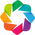

In [67]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
from bokeh.plotting import show

show(hv.render(x))

## Looking Further into the Data

While our analysis helps us understand what players are doing when they select, we have not answered why. We want to take the most successful and popular heroes, and attempt to find the heroes that Pangolier is most successful against, and most unsuccessful against.

We will take a look at a single hero - *Pangolier*. Pangolier is the most successful hero that has been picked at least 20% of the time in matches. To find which heroes Pangolier accels against and the ones he struggles against, we first need to find all of the matches in which Pangolier was picked. As we find those matches, we can use another mask to split the matches where Pangolier wins from those where he loses. Ultimately we want to find the match IDs of all of these matches, and so we will utilize the `match_id` column. Your task is to perform the following:

1. Create a mask on `matches_heroes` to select the localized name `Pangolier`

2. Create variables `pangolier_matches_wins` and `pangolier_matches_losses` that combines the above mask with the `wins` column (which we can use as a mask) and pull out the `match_id`
    * you can *negate* a mask by putting a `~` in front of it!

3. Create a new aggregator dictionary that applies a `count` operation to the `win` column 

4. Create a new mask on `matches_heroes` to select losses and where the `match_id` is one of the values in `pangolier_matches_wins`
    * for the first piece of the mask just negate the `win` column
    * for the secon piece of the mask we can use the special `isin` operator of a series

5. Create a new mask on `matches_heroes` to select wins and where the `match_id` is one of the values in `pangolier_matches_losses`
    * for the first piece of the mask just use the `win` column as it is
    * for the secon piece of the mask we can use the special `isin` operator of a series

6. Create a new variable `pangolier_wins` by applying the mask from step 4 to `matches_heroes`, then group the dataframe by `localized_name` and apply the aggregation
    * rename the columns in `pangolier_wins` to `['losses_to_pangolier']`

7. Create a new variable `pangolier_losses` by applying the mask from step 5 to `matches_heroes`, then group the dataframe by `localized_name` and apply the aggregation
    * rename the columns in `pangolier_losses` to `['wins_against_pangolier']`

8. Merge `pangolier_wins` and `pangolier_losses` using:

    `pangolier_stats = pw.merge(pl, left_index=True, right_index=True).fillna(0)`

9. Add a `win_pct` column using the `losses_to_pangolier` and `wins_against_pangolier` columns

In [68]:
matches_heroes

,hero_id,team,order,match_id,win,id,name,localized_name,primary_attr,attack_type,roles,legs
0,43,1,4,7102649472,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
1,43,0,4,7102798112,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
2,43,1,15,7103690699,True,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
3,43,0,5,7101146267,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
4,43,1,7,7101260263,False,43,npc_dota_hero_death_prophet,Death Prophet,int,Ranged,"[Carry, Pusher, Nuker, Disabler]",2
...,...,...,...,...,...,...,...,...,...,...,...,...
10555,50,1,15,7342166210,False,50,npc_dota_hero_dazzle,Dazzle,all,Ranged,"[Support, Nuker, Disabler]",2
10556,50,1,6,7126048768,False,50,npc_dota_hero_dazzle,Dazzle,all,Ranged,"[Support, Nuker, Disabler]",2
10557,27,1,22,7341448039,False,27,npc_dota_hero_shadow_shaman,Shadow Shaman,int,Ranged,"[Support, Pusher, Disabler, Nuker, Initiator]",2
10558,27,0,22,7033635338,True,27,npc_dota_hero_shadow_shaman,Shadow Shaman,int,Ranged,"[Support, Pusher, Disabler, Nuker, Initiator]",2


In [71]:
# perform steps 1-2 here
# Step 1: Create a mask to select matches with localized name "Pangolier"

#Match Win Mask 
pangolier_mask = matches_heroes['localized_name'] == 'Pangolier'
pangolier_matches = matches_heroes[pangolier_mask]
pangolier_win_mask = pangolier_matches.win == True 
pangolier_matches_wins = matches_heroes[pangolier_mask & pangolier_win_mask]


# Match Lost Mask 
pangolier_lose_mask = pangolier_matches.win == False 
pangolier_matches_lose = matches_heroes[pangolier_mask & pangolier_lose_mask]
# Step 2: Create variables to combine the mask with wins and losses

# Display the results

pangolier_matches_wins
pangolier_matches_lose








,hero_id,team,order,match_id,win,id,name,localized_name,primary_attr,attack_type,roles,legs
4210,120,1,6,7115496899,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4211,120,1,7,7101349069,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4213,120,0,22,7103789936,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4217,120,1,15,7122028845,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4219,120,0,17,7116132831,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
4409,120,0,16,7224616279,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4410,120,1,15,7231824757,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4413,120,0,14,7223095438,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4414,120,0,22,7224564929,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2


In [72]:
pangolier_matches_lose

,hero_id,team,order,match_id,win,id,name,localized_name,primary_attr,attack_type,roles,legs
4210,120,1,6,7115496899,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4211,120,1,7,7101349069,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4213,120,0,22,7103789936,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4217,120,1,15,7122028845,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4219,120,0,17,7116132831,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
4409,120,0,16,7224616279,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4410,120,1,15,7231824757,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4413,120,0,14,7223095438,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
4414,120,0,22,7224564929,False,120,npc_dota_hero_pangolier,Pangolier,all,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2


With the matches identified, we can now filter our matches on those match IDs to find all heroes involved in those matches.

In [75]:
# perform steps 3-7 here
aggregator_win={
    'win':['count']
}
match_losses_mask = pangolier_matches_wins.groupby('win').agg(aggregator_win)

match_losses_mask

,win
,count
win,
True,114


In [277]:
# perform steps 8-9 here

In [278]:
pangolier_stats.sort_values('win_pct', ascending=False).head(20)

NameError: name 'pangolier_stats' is not defined

Now that we have our data for the success rates against `Pangolier`, we can plot the data along with an identity line to help us identify the best and worst heroes to play against `Pangolier`.

In [ ]:
import holoviews as hv
(
    pangolier_stats.hvplot.scatter(
        x='losses_to_pangolier',
        y='wins_against_pangolier',
        s='win_pct',
        c='win_pct',
        hover_cols=['localized_name']
    ).opts(default_tools=['box_zoom', 'reset']) * hv.Path(
        [[[0,0,0], [30,30,0]]]
    ).opts(color='red', default_tools=['box_zoom', 'reset'],
)
).opts(
    show_grid=True,
    width=768,
    height=512
)

The red line represents the even win/loss ratio for a hero against Pangolier. The farther above the line, the more successful a hero is against `Pangolier`, whereas the father below the line, the less successful a hero is. We can clearly see that the hero `Leshrac` is the most successful hero against `Pangolier`, and `Storm Spirit` is the least successful.

What else can we analyze?